In [1]:
!pip install pandas matplotlib seaborn tensorflow scikit-learn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
#Load the dataset
df = pd.read_csv('customer_churn-1.csv')

In [4]:
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [9]:
#Data Manipulation
#A.a
total_male_customers = df[df['gender'] == 'Male'].shape[0]
print(total_male_customers)


3555


In [8]:
#A.b
total_DSL_customers = df['InternetService'].shape[0]

print(total_DSL_customers)


7043


In [15]:
#A.c
new_customers_female_senior_citizens =  df[(df['gender'] == 'Female') & 
                                  (df['SeniorCitizen'] == 1) & 
                                  (df['PaymentMethod'] == 'Mailed check')]

print(new_customers_female_senior_citizens)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
139   0390-DCFDQ  Female              1     Yes         No       1   
176   2656-FMOKZ  Female              1      No         No      15   
267   3197-ARFOY  Female              1      No         No      19   
451   5760-WRAHC  Female              1      No         No      22   
470   4933-IKULF  Female              1      No         No      17   
694   2682-KEVRP  Female              1      No         No      22   
747   3966-HRMZA  Female              1      No         No       3   
947   9904-EHEVJ  Female              1     Yes        Yes      32   
1029  4184-TJFAN  Female              1     Yes        Yes       3   
1112  2176-LVPNX  Female              1      No         No      71   
1513  0661-XEYAN  Female              1      No         No       1   
1811  2070-XYMFH  Female              1      No         No      23   
1831  3402-XRIUO  Female              1     Yes         No      22   
1864  7105-MXJLL  Fe

In [20]:
#A.d
# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# NaN values in 'TotalCharges' with 0 
df['TotalCharges'].fillna(0, inplace=True)

# Extraction based on the conditions
new_customer_tenure_charges = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

print("New customer dataframe (tenure < 10 or TotalCharges < 500):")
print(new_customer_tenure_charges)

New customer dataframe (tenure < 10 or TotalCharges < 500):
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
7     6713-OKOMC  Female              0      No         No      10   
...          ...     ...            ...     ...        ...     ...   
7029  2235-DWLJU  Female              1      No         No       6   
7030  0871-OPBXW  Female              0      No         No       2   
7032  6894-LFHLY    Male              1      No         No       1   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0              No 

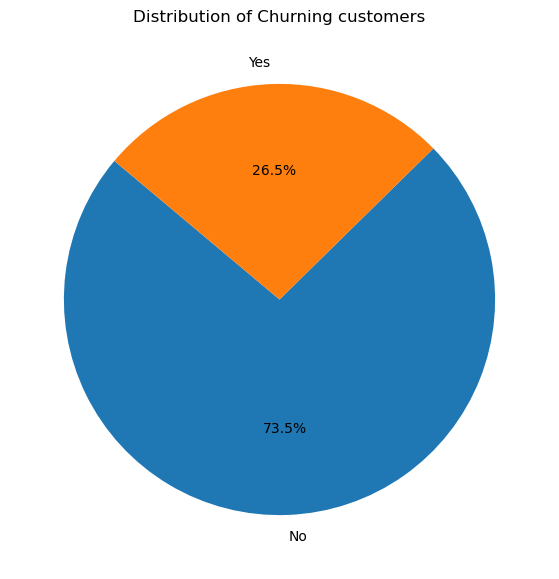

In [23]:
#Data Visualization
# B.a
churn_counts = df['Churn'].value_counts()
plt.figure(figsize = (9,7))
plt.pie(churn_counts, labels = churn_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Distribution of Churning customers')
plt.show()

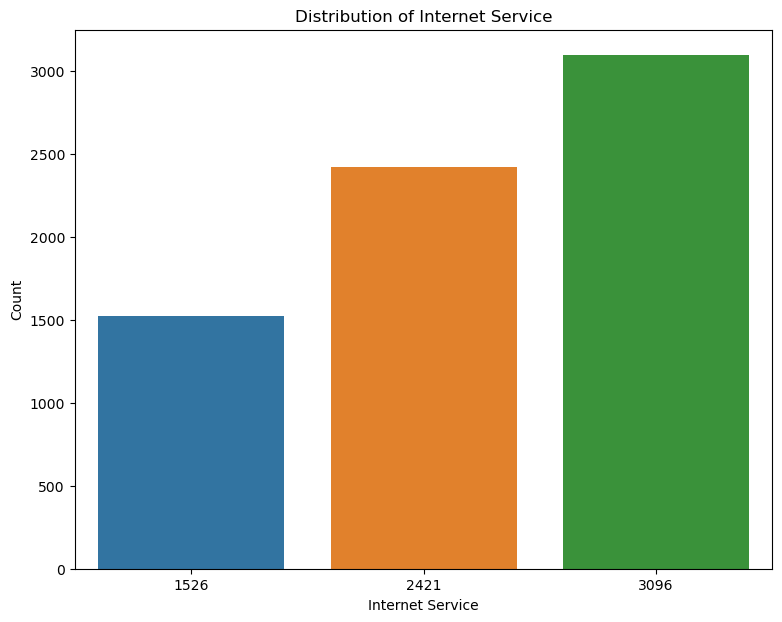

In [25]:
# B.b
internet_service_counts = df['InternetService'].value_counts()
plt.figure(figsize=(9,7))
sns.barplot(x=internet_service_counts, y = internet_service_counts.values)
plt.title('Distribution of Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

In [28]:
#C. Model Building
# C.a
#Convert to binary
df['Churn'] = df['Churn'].apply(lambda x:1 if x == 'Yes' else 0)

#Extract features and target
X = df[['tenure']]
y = df['Churn']

#Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Epoch 1/150


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7289 - loss: 0.5615 - val_accuracy: 0.7471 - val_loss: 0.4973
Epoch 2/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7295 - loss: 0.5331 - val_accuracy: 0.7569 - val_loss: 0.5019
Epoch 3/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.7407 - loss: 0.5197 - val_accuracy: 0.7471 - val_loss: 0.5015
Epoch 4/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7446 - loss: 0.5301 - val_accuracy: 0.7471 - val_loss: 0.4947
Epoch 5/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.7327 - loss: 0.5282 - val_accuracy: 0.7569 - val_loss: 0.5071
Epoch 6/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.7364 - loss: 0.5264 - val_accuracy: 0.7569 - val_loss: 0.4948
Epoch 7/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.7392 - loss: 0.5218 - val_accuracy: 0.7569 - val_loss: 0.4947
Epoch 8/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.7463 - loss: 0.5268 - val_ac

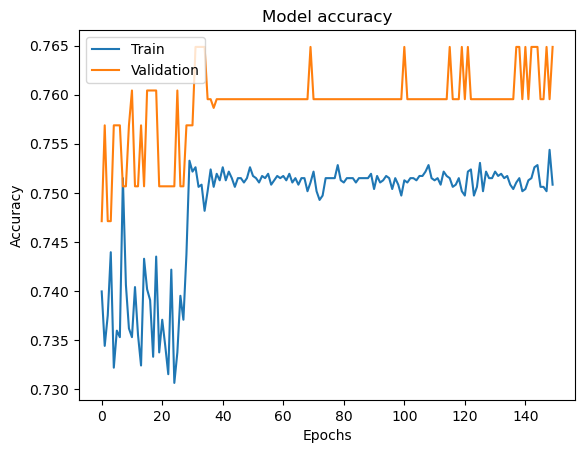

In [29]:
# Define the model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2)

# Predict values
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the Accuracy vs Epochs graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/150


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6948 - loss: 0.8030 - val_accuracy: 0.7507 - val_loss: 0.5188
Epoch 2/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7246 - loss: 0.5841 - val_accuracy: 0.7507 - val_loss: 0.5234
Epoch 3/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.7201 - loss: 0.5707 - val_accuracy: 0.7507 - val_loss: 0.5314
Epoch 4/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7335 - loss: 0.5578 - val_accuracy: 0.7507 - val_loss: 0.5144
Epoch 5/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.7340 - loss: 0.5415 - val_accuracy: 0.7507 - val_loss: 0.5171
Epoch 6/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.7387 - loss: 0.5378 - val_accuracy: 0.7507 - val_loss: 0.5147
Epoch 7/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7403 - loss: 0.5383 - val_accuracy: 0.7507 - val_loss: 0.5156
Epoch 8/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.7353 - loss: 0.5424 - val_ac

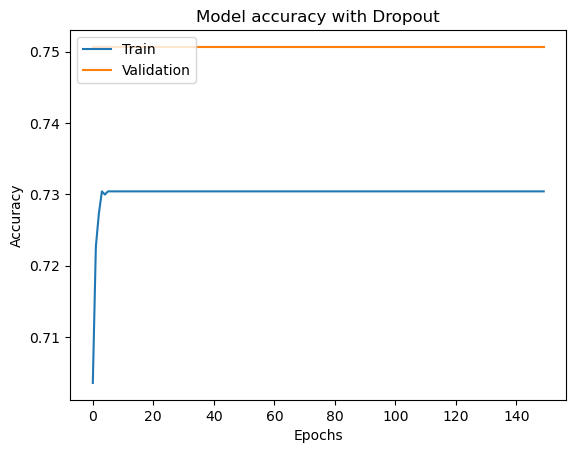

In [30]:
# C.b
# Model with dropout
model_dropout = Sequential()
model_dropout.add(Dense(12, input_dim=1, activation='relu'))
model_dropout.add(Dropout(0.3))
model_dropout.add(Dense(8, activation='relu'))
model_dropout.add(Dropout(0.2))
model_dropout.add(Dense(1, activation='sigmoid'))

# Compile 
model_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2)

# Predict values on the test set
y_pred_dropout = (model_dropout.predict(X_test) > 0.5).astype("int32")

# Build  confusion matrix
cm_dropout = confusion_matrix(y_test, y_pred_dropout)
print("Confusion Matrix with Dropout:")
print(cm_dropout)

# Plot Accuracy vs Epochs graph
plt.plot(history_dropout.history['accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Model accuracy with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/150


C:\Users\DELL\AppData\Local\Temp\ipykernel_12656\968325397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12656\968325397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalCharges'].fillna(X['TotalCharges'].mean(), inplace=True)
C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`

451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5704 - loss: 25.5880 - val_accuracy: 0.7675 - val_loss: 0.9729
Epoch 2/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.7380 - loss: 0.7340 - val_accuracy: 0.7870 - val_loss: 0.9938
Epoch 3/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.7227 - loss: 0.9575 - val_accuracy: 0.7799 - val_loss: 0.7266
Epoch 4/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.7251 - loss: 0.8608 - val_accuracy: 0.7853 - val_loss: 0.6448
Epoch 5/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.7341 - loss: 1.1789 - val_accuracy: 0.7791 - val_loss: 1.4694
Epoch 6/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7357 - loss: 1.1084 - val_accuracy: 0.7205 - val_loss: 0.5280
Epoch 7/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.7124 - loss: 1.0755 - val_accuracy: 0.7924 - val_loss: 1.0606
Epoch 8/150
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.7545 - loss: 0.7414 - val_a

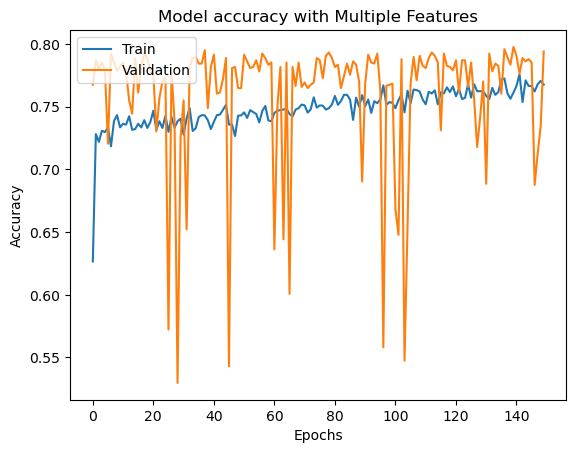

In [32]:
# C.c
# Extract features and target
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# Handle missing values in 'TotalCharges'
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X['TotalCharges'].fillna(X['TotalCharges'].mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model_multi = Sequential()
model_multi.add(Dense(12, input_dim=3, activation='relu'))
model_multi.add(Dense(8, activation='relu'))
model_multi.add(Dense(1, activation='sigmoid'))

# Compile 
model_multi.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit
history_multi = model_multi.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2)

# Predict the values on the test set
y_pred_multi = (model_multi.predict(X_test) > 0.5).astype("int32")

# confusion matrix
cm_multi = confusion_matrix(y_test, y_pred_multi)
print("Confusion Matrix with Multiple Features:")
print(cm_multi)

# Accuracy vs Epochs graph
plt.plot(history_multi.history['accuracy'])
plt.plot(history_multi.history['val_accuracy'])
plt.title('Model accuracy with Multiple Features')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
